In [11]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload the ZIP file

Saving UpdatedResumeDataSet.csv.zip to UpdatedResumeDataSet.csv (1).zip


In [12]:
import zipfile
import os

zip_path = next(iter(uploaded))  # Gets the uploaded file name
extract_path = "unzipped_data"

# Extract
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [14]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # Tokenization
    tokens = nltk.word_tokenize(text)

    # Lowercasing
    tokens = [token.lower() for token in tokens]

    # Stopword removal
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join tokens back into a string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
csv_file_path = os.path.join(extract_path, 'UpdatedResumeDataSet.csv')
df = pd.read_csv(csv_file_path)

# Display head, tail, and shape
print("Head of the dataframe:")
display(df.head())

print("\nTail of the dataframe:")
display(df.tail())

print("\nShape of the dataframe:")
print(df.shape)

Head of the dataframe:


,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."



Tail of the dataframe:


,Category,Resume
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...



Shape of the dataframe:
(962, 2)


In [16]:
category = df['Category'].value_counts().reset_index()
category

,Category,count
0,Java Developer,84
1,Testing,70
2,DevOps Engineer,55
3,Python Developer,48
4,Web Designing,45
5,HR,44
6,Hadoop,42
7,Sales,40
8,Data Science,40
9,Mechanical Engineer,40


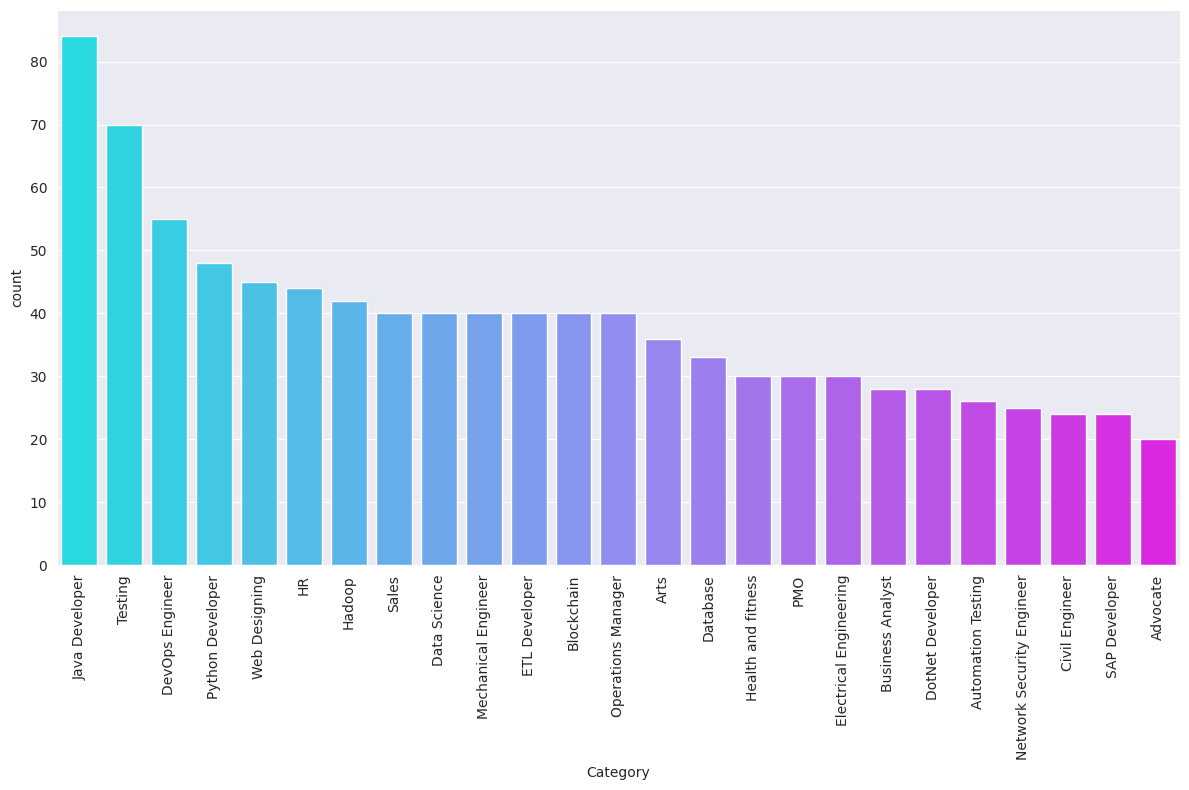

In [17]:
plt.figure(figsize=(12,8))
sns.barplot(x=category['Category'], y=category['count'], palette='cool')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

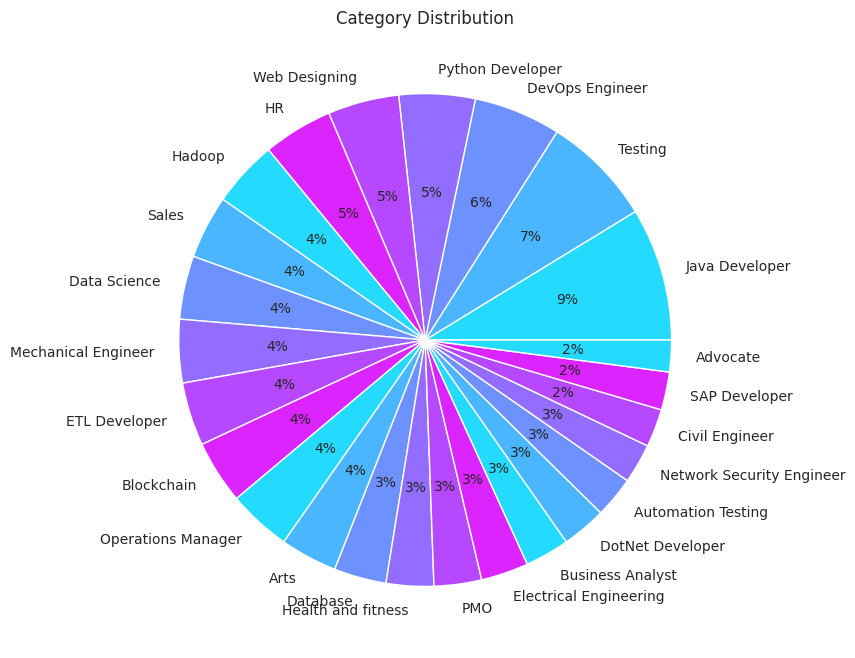

In [18]:
plt.figure(figsize=(12,8))
plt.pie(category['count'], labels=category['Category'],
        colors=sns.color_palette('cool'), autopct='%.0f%%')
plt.title('Category Distribution')
plt.show()

In [19]:
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

In [20]:
df['cleaned'] = df['Resume'].apply(lambda x:cleanResume(x))
df.head()

,Category,Resume,cleaned
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [21]:
#getting the entire resume text
corpus=" "
for i in range(0,len(df)):
    corpus= corpus+ df["cleaned"][i]

In [22]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
#Tokenizing the text
tokens = tokenizer.tokenize(corpus)
len(tokens)

411913

In [24]:
#now we shall make everything lowercase for uniformity
#to hold the new lower case words
words = []
# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())
words[0:5]

['skills', 'programming', 'languages', 'python', 'pandas']

In [25]:
# Now encode the data
label = LabelEncoder()
df['new_Category'] = label.fit_transform(df['Category'])
df.head()

,Category,Resume,cleaned,new_Category
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...,6
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...,6
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...,6
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...,6
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...,6


(array([ 82.,  68.,  97.,  83.,  70., 116., 124.,  95.,  72., 155.]),
 array([ 0. ,  2.4,  4.8,  7.2,  9.6, 12. , 14.4, 16.8, 19.2, 21.6, 24. ]),
 <BarContainer object of 10 artists>)

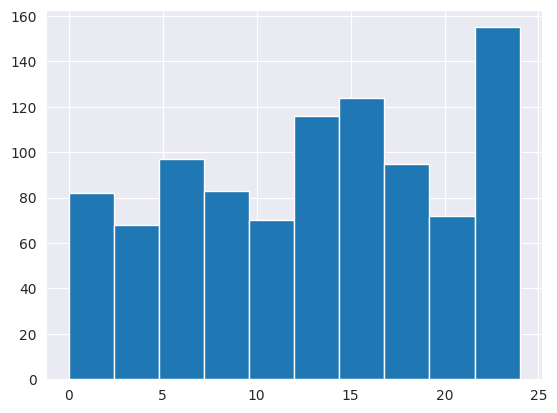

In [26]:
plt.hist(df['new_Category'])

In [27]:
# Vectorizing the cleaned columns
text = df['cleaned'].values
target = df['new_Category'].values
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(text)
WordFeatures = word_vectorizer.transform(text)

In [28]:
WordFeatures.shape

(962, 1500)

In [29]:
print(WordFeatures)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 113052 stored elements and shape (962, 1500)>
  Coords	Values
  (0, 32)	0.0975547460596014
  (0, 60)	0.0664608367862825
  (0, 77)	0.06328766834077083
  (0, 88)	0.11683922257576454
  (0, 92)	0.1574094563008807
  (0, 95)	0.04530039590189425
  (0, 97)	0.056592621036255286
  (0, 123)	0.0626605414035602
  (0, 138)	0.05934045289907955
  (0, 156)	0.03345683901682836
  (0, 165)	0.051887823885155254
  (0, 181)	0.058848423700702826
  (0, 192)	0.08191895795914703
  (0, 213)	0.05537763014794581
  (0, 214)	0.046485359199680845
  (0, 216)	0.10267438238479035
  (0, 226)	0.06497235003508872
  (0, 245)	0.06817483357089134
  (0, 249)	0.05934045289907955
  (0, 251)	0.06119256740342124
  (0, 256)	0.11840454274050509
  (0, 264)	0.06993163033903951
  (0, 274)	0.01598968725427598
  (0, 286)	0.03194636575511738
  (0, 304)	0.07641489061021026
  :	:
  (961, 1141)	0.11889174736163466
  (961, 1142)	0.0540425856223906
  (961, 1150)	0.05470603096763049
 

In [30]:
# Separate train and test data
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, target, random_state=24, test_size=0.2)

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((769, 1500), (193, 1500), (769,), (193,))

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9896373056994818


In [35]:
print(f'---------------------------------\n| Training Accuracy   :- {round(model.score(X_train, y_train)*100, 2)}% |')
print(f'---------------------------------\n| Validation Accuracy :- {round(model.score(X_test, y_test)*100, 2)}% |\n---------------------------------')

---------------------------------
| Training Accuracy   :- 100.0% |
---------------------------------
| Validation Accuracy :- 98.96% |
---------------------------------


In [36]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         9
           2       1.00      0.67      0.80         6
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00        10
          11       0.80      1.00      0.89         8
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00        16
          16       1.00      1.00      1.00         7
          17       1.00    

In [37]:
#Stop words are generally the most common words in a language.
#English stop words from nltk.
stopwords = nltk.corpus.stopwords.words('english')
words_new = []
#Now we need to remove the stop words from the words variable
#Appending to words_new all words that are in words but not in sw
for word in words:
    if word not in stopwords:
        words_new.append(word)

In [38]:
words_new[0:7]

['skills', 'programming', 'languages', 'python', 'pandas', 'numpy', 'scipy']

In [40]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [41]:
# Perform Lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
wn = WordNetLemmatizer()
lem_words=[]
for word in words_new:
    word=wn.lemmatize(word)
    lem_words.append(word)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [42]:
lem_words[0:8]

['skill',
 'programming',
 'language',
 'python',
 'panda',
 'numpy',
 'scipy',
 'scikit']

In [43]:
same=0
diff=0
for i in range(0,1832):
    if(lem_words[i]==words_new[i]):
        same=same+1
    elif(lem_words[i]!=words_new[i]):
        diff=diff+1
print('Number of words Lemmatized=', diff)
print('Number of words not Lemmatized=', same)

Number of words Lemmatized= 264
Number of words not Lemmatized= 1568


<Axes: xlabel='Samples', ylabel='Counts'>

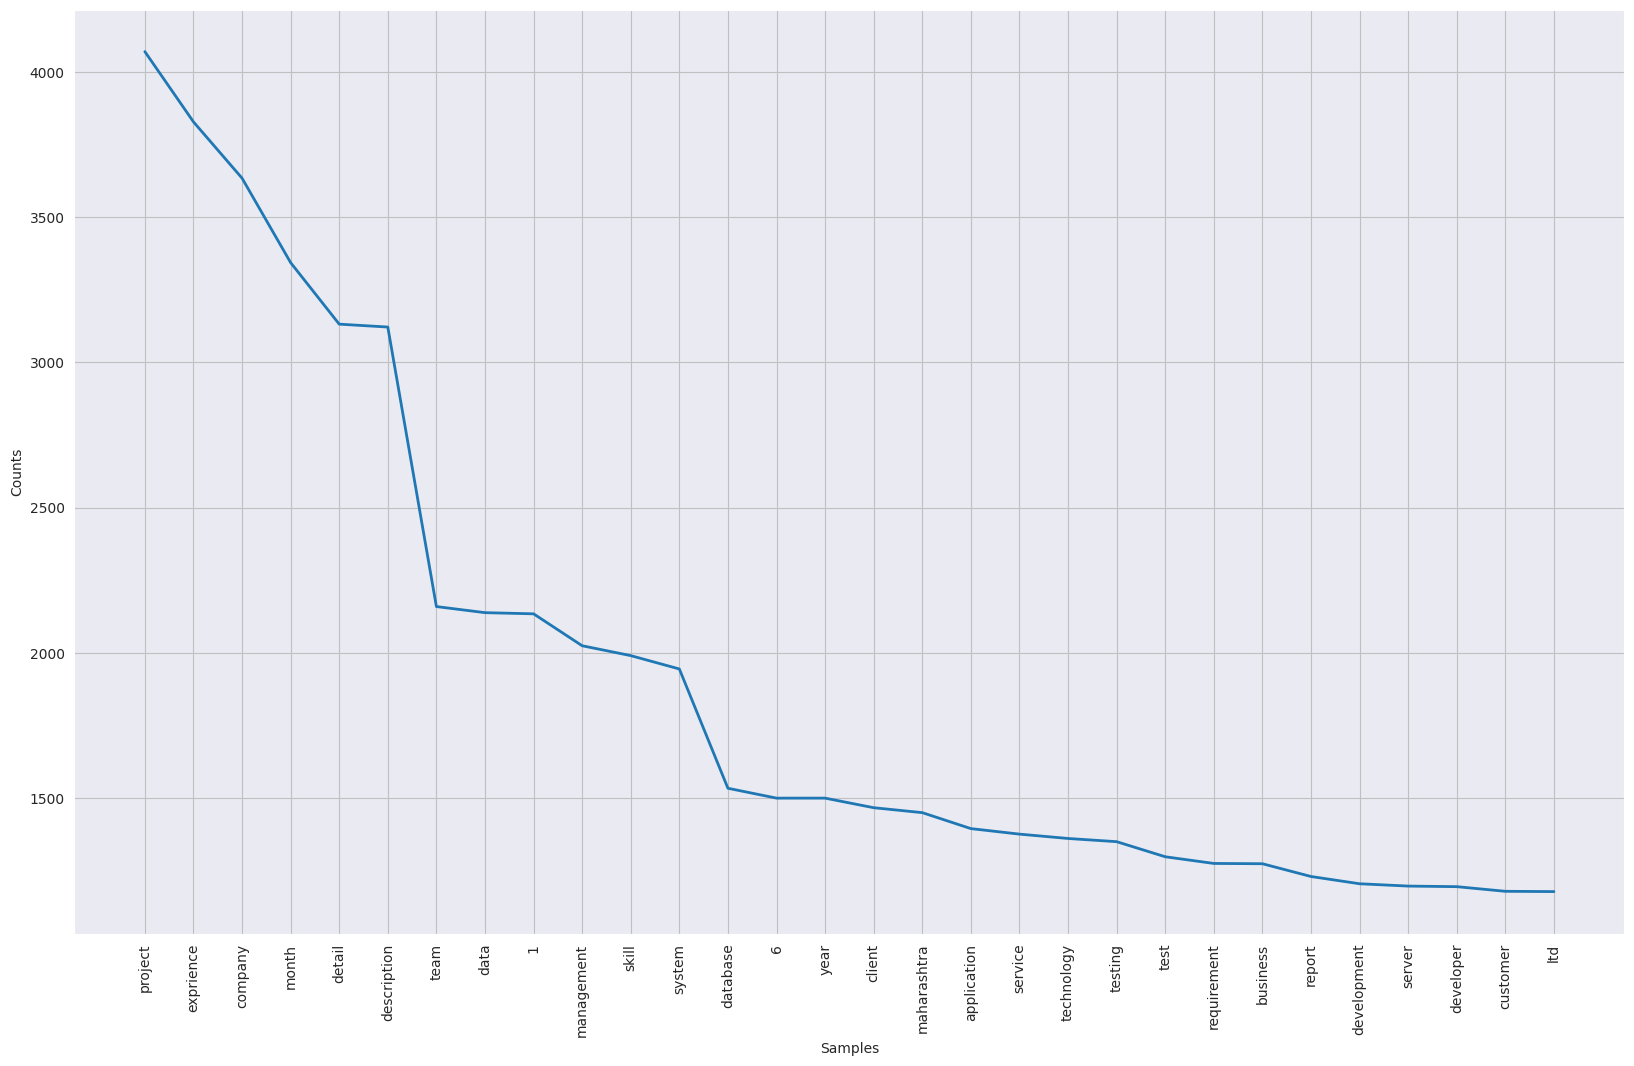

In [44]:
#The frequency distribution of the words
freq_dist = nltk.FreqDist(lem_words)
#Frequency Distribution Plot
plt.subplots(figsize=(20,12))
freq_dist.plot(30)


In [48]:
# Function to predict the category of a new resume
def predict_category(resume_text):
    # Preprocess the resume text
    cleaned_resume = cleanResume(resume_text)

    # Vectorize the cleaned resume using the fitted TF-IDF vectorizer
    vectorized_resume = word_vectorizer.transform([cleaned_resume])

    # Predict the category using the trained model
    predicted_label = model.predict(vectorized_resume)

    # Inverse transform the predicted label back to the original category name
    predicted_category = label.inverse_transform(predicted_label)

    return predicted_category[0]

Now you can test the prediction function with a sample resume.

In [49]:
sample_resume = """
Skills: Python, Machine Learning, Data Analysis, SQL, TensorFlow, Keras
Experience: Developed machine learning models for fraud detection.
Education: Master's in Computer Science.
"""

predicted_category = predict_category(sample_resume)
print(f"The predicted category for the resume is: {predicted_category}")

The predicted category for the resume is: Data Science


In [50]:
sample_resume_2 = """
Experienced software engineer with expertise in Java, Spring Boot, and microservices.
Strong understanding of data structures and algorithms.
Bachelor's degree in Computer Engineering.
"""

predicted_category_2 = predict_category(sample_resume_2)
print(f"The predicted category for the second resume is: {predicted_category_2}")

The predicted category for the second resume is: Java Developer
